In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def year_change(year):
    '''
    function to convert one and two digit years into four digits
    '''
    if len(year)==1:
        year='200'+ year
    else:
        year='20'+year

    return year

In [3]:
# import the Vancouver Police Department's most recent data, available every Sunday.
# this will be automated in the next iteration of this project
df=pd.read_csv('/Users/michaeljoyce/Desktop/Capstone/data/crime_csv_all_years.csv',parse_dates={'dttime':[1,2,3]}, keep_date_col=True)
# dttime added for the next step which is gatherind day of the week data

# make a copy of the original data to keep an original dataframe intact
df_temp=df.copy()

# add day of the week to original data
df_temp['day_of_week']=df_temp['dttime'].dt.weekday_name

# remove missing data, all (or nearly all) of which is the non-property crime data
# non-property crime data lacks all address information due to privacy concerns
df2=df_temp.dropna()



# rename columns as all caps is tedious to work with
df3=df2.rename(index=str, columns={"YEAR": "year", "MONTH": "month", "DAY":"day","HOUR":"hour",
                               "MINUTE":"minute", "NEIGHBOURHOOD":"neighborhood"})


# sort by date
df4=df3.sort_values(['year','month','day','hour','minute'])

# remove extraneous data
df5=df4.drop(['minute', 'HUNDRED_BLOCK','TYPE'], axis=1)

# change all possible values to numeric form
df6=df5.apply(pd.to_numeric, errors='ignore')

# bin by 1200am-1159am, 1200pm -1159pm
hourbins = [-0.1,12.0,24.1]
hourlabels = ['1200am-1159am', '1200pm-1159pm']
# group by neighborhood, by day_segment
df6['day_segment'] = pd.cut(df6["hour"], bins=hourbins,labels=hourlabels)

# remove extraneous data
df7=df6[['year', 'month', 'day', 'day_of_week','day_segment', 'neighborhood']]

# group by neighborhood, by day_segment
df8=df7.groupby(df7.columns.tolist()).size()
df9=pd.DataFrame(df8).reset_index()
df10=df9.rename(index=str, columns={ 0 :"number_of_crimes"})
# make final copy for merging

# remove outlier of 499 crimes due to 2011 Stanley Cup riot
df11=df10.loc[df10['number_of_crimes']!=df10['number_of_crimes'].max()]

# remove second outlier of 104 crimes due to unknown reason
df12=df11.loc[df11['number_of_crimes']!=df11['number_of_crimes'].max()]


df_final=df12.copy()

In [4]:
wdf=pd.read_csv('/Users/michaeljoyce/Desktop/Capstone/data/BA_weather_data.csv')

# make a copy of the original data to keep an original dataframe intact
wdf2=wdf.copy()

# remove extraneous data
wdf3=wdf2[['DATE', 'TMAX', 'TMIN']]

# rename columns as all caps is tedious to work with
wdf4=wdf3.rename(index=str, columns={ "DATE":"date", "TMAX":"tmax","TMIN":"tmin"})

# extract data from wdf3 in a more usable form
wdf4['year'] = wdf4.date.str.split('/').str.get(2)
wdf4['month'] = wdf4.date.str.split('/').str.get(0)
wdf4['day']=wdf4.date.str.split('/').str.get(1)
wdf4=wdf4.drop('date', axis=1)
# change year from 2 digits to 4 for merging
wdf4.year='20'+ wdf4.year
# change all possible values to numeric form
wdf4=wdf4.apply(pd.to_numeric, errors='ignore')

# make final copy for merging
wdf_final=wdf4.copy()

In [5]:
# import the consumer price index for Vancouver, available monthly from Statistics Canada
# this will be automated in the next iteration
cpi_df=pd.read_csv('/Users/michaeljoyce/Desktop/Capstone/data/consumer_price_index_nohead.csv')
# make a copy of the original data to keep an original dataframe intact
cpi_df2=cpi_df.copy()


# extract data from cpi_df2 in a more usable form
cpi_df2['year'] = cpi_df2.date.str.split('-').str.get(0)
cpi_df2['month'] = cpi_df2.date.str.split('-').str.get(1)
cpi_df2.drop('date', axis=1,inplace=True)
cpi_df3=cpi_df2.copy()

# change month from name to numeric
import calendar
d=dict((v,k) for k,v in enumerate(calendar.month_abbr))
cpi_df3.month=cpi_df3.month.map(d)

# change year from 1 or 2 digits to 4 for merging
cpi_df3['year']=cpi_df3['year'].apply(year_change)

# change all possible values to numeric form
cpi_df3=cpi_df3.apply(pd.to_numeric, errors='ignore')

# make final copy for merging
cpi_df_final=cpi_df3.copy()

In [6]:
# import unemployment data for British Columbia, available monthly from Statistics Canada
# this will be automated in the next iteration
emp_df=pd.read_csv('/Users/michaeljoyce/Desktop/Capstone/data/employment_nohead.csv')
# make a copy of the original data to keep an original dataframe intact
emp_df2=emp_df.copy()

# extract data from cpi_df2 in a more usable form
emp_df2['year'] = emp_df2.date.str.split('-').str.get(0)
emp_df2['month'] = emp_df2.date.str.split('-').str.get(1)
emp_df3=emp_df2.drop('date', axis=1)

# change month from name to numeric
import calendar
d=dict((v,k) for k,v in enumerate(calendar.month_abbr))
emp_df3.month=emp_df3.month.map(d)
# change year from 1 or 2 digits to 4 for merging
emp_df3['year']=emp_df3['year'].apply(year_change)

# change all possible values to numeric form
emp_df4=emp_df3.apply(pd.to_numeric, errors='ignore')

# make final copy for merging
emp_df_final=emp_df4.copy()

In [7]:
# import the gross domestic product for British Columbia, available monthly from Statistics Canada
# this will be automated in the next iteration and will be for Vancouver at best and British Columbia
# if this is not possible
gdp_df=pd.read_csv('/Users/michaeljoyce/Desktop/Capstone/data/gdp_2007dollars_nohead.csv')
# make a copy of the original data to keep an original dataframe intact
gdp_df2=gdp_df.copy()

# extract data from cpi_df2 in a more usable form
gdp_df2['year'] = gdp_df2.date.str.split('-').str.get(0)
gdp_df2['month'] = gdp_df2.date.str.split('-').str.get(1)
gdp_df3=gdp_df2.drop('date', axis=1)
gdp_df4=gdp_df3.copy()

# change month from name to numeric
d=dict((v,k) for k,v in enumerate(calendar.month_abbr))
gdp_df4.month=gdp_df4.month.map(d)
# change year from 1 or 2 digits to 4 for merging
gdp_df4['year']=gdp_df4['year'].apply(year_change)

# change all possible values to numeric form
gdp_df5=gdp_df4.apply(pd.to_numeric, errors='ignore')

# make final copy for merging
gdp_df_final=gdp_df5.copy()

In [8]:
# import drug posession data for British Columbia, available monthly from Statistics Canada
# this will be automated in the next iteration
drugs_df=pd.read_csv('/Users/michaeljoyce/Desktop/Capstone/data/drug_offences_2006_to_2016.csv')
# make a copy of the original data to keep an original dataframe intact
drugs_df2=drugs_df.copy()

# remove extraneous data
drugs_df3=drugs_df2[['year','Possession, cocaine ','Heroin, possession ',]]
# make final copy to avoid slicing issues in Pandas
drugs_df4=drugs_df3.copy()

# insert row using means for 2017
drugs_df4.loc[14]=[2017, drugs_df4['Possession, cocaine '].mean(),drugs_df4['Heroin, possession '].mean()]

# insert row using means for 2018
drugs_df4.loc[15]=[2018, drugs_df4['Possession, cocaine '].mean(),drugs_df4['Heroin, possession '].mean()]

# make final copy for merging
drugs_df_final=drugs_df4.copy()

In [9]:
# import annual heroin price data for Canada, gathered manually from various publications of the United Nations
# this will be automated in the next iteration
hp_df=pd.read_csv('/Users/michaeljoyce/Desktop/Capstone/data/Heroin_Prices.csv')
# make a copy of the original data to keep an original dataframe intacthp_df=pd.read_csv('data/Heroin_Prices.csv')
hp_df2=hp_df.copy()

# insert row using means for 2018
hp_df2.loc[15]=[2018, hp_df2['Heroin Price Canada'].mean()]

# make final copy for merging
hp_df_final=hp_df2.copy()



In [10]:
'''
function that compiles all databases and also performs feature engineering
'''

# merge exisitng dataframes
new_df1=pd.merge(wdf_final,df_final, how='left', on=['year','month','day'])



# merge exisitng dataframes
new_df2=pd.merge(new_df1,cpi_df_final, how='left', on=['year','month'])



# merge exisitng dataframes
new_df3=pd.merge(new_df2,gdp_df_final, how='left', on=['year','month'])



# merge exisitng dataframes
new_df4=pd.merge(new_df3,emp_df_final, how='left', on=['year','month'])



# merge exisitng dataframes
new_df5=pd.merge(new_df4,drugs_df_final, how='left', on=['year'])



# merge exisitng dataframes
new_df6=pd.merge(new_df5,hp_df_final, how='left', on=['year'])

# change all possible values to numeric form
new_df7=new_df6.apply(pd.to_numeric, errors='ignore')

In [11]:
new_df7.head()

,tmax,tmin,year,month,day,day_of_week,day_segment,neighborhood,number_of_crimes,consumer_price_index,gdp_millions_2007,seasonally_adjusted_unemployment,unadjusted_unemployment,"Possession, cocaine","Heroin, possession",Heroin Price Canada
0,50.0,40.0,2003,1,1,Wednesday,1200am-1159am,Arbutus Ridge,1.0,100.9,1305716,7.9,7.5,4682.0,515.0,202.0
1,50.0,40.0,2003,1,1,Wednesday,1200am-1159am,Central Business District,20.0,100.9,1305716,7.9,7.5,4682.0,515.0,202.0
2,50.0,40.0,2003,1,1,Wednesday,1200am-1159am,Dunbar-Southlands,1.0,100.9,1305716,7.9,7.5,4682.0,515.0,202.0
3,50.0,40.0,2003,1,1,Wednesday,1200am-1159am,Fairview,1.0,100.9,1305716,7.9,7.5,4682.0,515.0,202.0
4,50.0,40.0,2003,1,1,Wednesday,1200am-1159am,Grandview-Woodland,8.0,100.9,1305716,7.9,7.5,4682.0,515.0,202.0


In [12]:
# one hot encode day_segment and day_of_week for regession
day_segment_number=['day_segment']
day_of_week_number=['day_of_week']
new_df8=pd.get_dummies(new_df7,columns=day_segment_number, drop_first=True)
new_df9=pd.get_dummies(new_df8,columns=day_of_week_number,drop_first=True)
new_df9.dropna()
new_df10=new_df9.copy()
# isolate the one high property crime neighborhood
temp_cbd_df=new_df10[new_df10.neighborhood == "Central Business District"]

In [13]:
temp_cbd_df.head()

,tmax,tmin,year,month,day,neighborhood,number_of_crimes,consumer_price_index,gdp_millions_2007,seasonally_adjusted_unemployment,...,"Possession, cocaine","Heroin, possession",Heroin Price Canada,day_segment_1200pm-1159pm,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
1,50.0,40.0,2003,1,1,Central Business District,20.0,100.9,1305716,7.9,...,4682.0,515.0,202.0,0,0,0,0,0,0,1
20,50.0,40.0,2003,1,1,Central Business District,17.0,100.9,1305716,7.9,...,4682.0,515.0,202.0,1,0,0,0,0,0,1
36,57.0,50.0,2003,1,2,Central Business District,16.0,100.9,1305716,7.9,...,4682.0,515.0,202.0,0,0,0,0,1,0,0
52,57.0,50.0,2003,1,2,Central Business District,20.0,100.9,1305716,7.9,...,4682.0,515.0,202.0,1,0,0,0,1,0,0
71,54.0,43.0,2003,1,3,Central Business District,7.0,100.9,1305716,7.9,...,4682.0,515.0,202.0,0,0,0,0,0,0,0


In [14]:
temp2_cbd_df=temp_cbd_df.drop(['neighborhood'],axis=1)
temp3_cbd_df=temp2_cbd_df.dropna()
cbd_df=temp3_cbd_df.copy()

In [15]:
cbd_df.describe()

,tmax,tmin,year,month,day,number_of_crimes,consumer_price_index,gdp_millions_2007,seasonally_adjusted_unemployment,unadjusted_unemployment,"Possession, cocaine","Heroin, possession",Heroin Price Canada,day_segment_1200pm-1159pm,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
count,11150.000000,11150.000000,11150.000000,11150.000000,11150.000000,11150.000000,11150.000000,1.115000e+04,11150.000000,11150.000000,11150.000000,11150.000000,11150.000000,11150.000000,11150.000000,11150.000000,11150.000000,11150.000000,11150.000000,11150.000000
mean,58.321076,42.844036,2010.157399,6.442063,15.706996,10.621345,115.019112,1.524454e+06,5.944242,5.959614,3337.036303,619.175518,262.475119,0.500359,0.142780,0.142960,0.142780,0.143049,0.142601,0.142960
std,11.738490,9.730146,4.421962,3.466846,8.798253,5.171707,7.622396,1.257017e+05,1.258004,1.266498,1009.179298,323.202488,47.574770,0.500022,0.349864,0.350047,0.349864,0.350139,0.349681,0.350047
min,17.000000,0.000000,2003.000000,1.000000,1.000000,1.000000,100.900000,1.305168e+06,3.500000,3.700000,2047.000000,316.000000,141.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,36.000000,2006.000000,3.000000,8.000000,7.000000,108.700000,1.434215e+06,4.700000,4.800000,2524.000000,379.000000,254.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,44.000000,2010.000000,6.000000,16.000000,10.000000,115.600000,1.489185e+06,6.100000,6.100000,2891.000000,515.000000,272.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,67.000000,50.000000,2014.000000,9.000000,23.000000,14.000000,120.500000,1.646852e+06,6.900000,7.000000,4682.000000,727.250000,297.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,96.000000,65.000000,2018.000000,12.000000,31.000000,43.000000,130.100000,1.762455e+06,8.300000,8.500000,4682.000000,1550.000000,335.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
cbd_df.columns

Index(['tmax', 'tmin', 'year', 'month', 'day', 'number_of_crimes',
       'consumer_price_index', 'gdp_millions_2007',
       'seasonally_adjusted_unemployment', 'unadjusted_unemployment',
       'Possession, cocaine ', 'Heroin, possession ', 'Heroin Price Canada',
       'day_segment_1200pm-1159pm', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday'],
      dtype='object')

In [17]:
cbd_df['number_of_crimes'].mean()

10.621345291479821

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X=cbd_df[['tmax', 'tmin', 'day', 
       'consumer_price_index', 'gdp_millions_2007',
       'seasonally_adjusted_unemployment', 'unadjusted_unemployment',
       'Possession, cocaine ', 'Heroin, possession ', 'Heroin Price Canada',
       'day_segment_1200pm-1159pm', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday']]

y=cbd_df['number_of_crimes']



In [20]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data

In [22]:
X_columns=['tmax', 'tmin',  'day', 
       'consumer_price_index', 'gdp_millions_2007',
       'seasonally_adjusted_unemployment', 'unadjusted_unemployment',
       'Possession, cocaine ', 'Heroin, possession ', 'Heroin Price Canada',
       'day_segment_1200pm-1159pm', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday']

In [23]:
from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn import linear_model
clf=linear_model.Lasso(alpha=0.2)
clf.fit(X_train,y_train)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
print(clf.coef_)

[ 0.14215037  0.09267179 -0.21374027  0.          0.         -0.40628146
 -0.          1.12646961  1.20178449  0.          2.02650335 -0.
  0.31745967  0.         -0.0282095  -0.         -0.13202543]


In [25]:
print(clf.intercept_)

10.5956438181


In [26]:
coeff_df=pd.DataFrame(clf.coef_, X_columns, columns=['Coefficient'])
coeff_df

,Coefficient
tmax,0.142150
tmin,0.092672
day,-0.213740
consumer_price_index,0.000000
gdp_millions_2007,0.000000
seasonally_adjusted_unemployment,-0.406281
unadjusted_unemployment,-0.000000
"Possession, cocaine",1.126470
"Heroin, possession",1.201784
Heroin Price Canada,0.000000


MAE: 3.31239342956
MSE: 18.1788679275
RMSE: 4.2636683651
R2 score:  0.321792083214


/Users/michaeljoyce/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


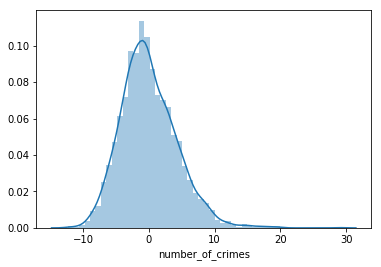

In [27]:
predictions1=clf.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))
print('R2 score: ',r2_score(y_test,predictions1))
sns.distplot(y_test-predictions1)

In [28]:
from sklearn.ensemble import RandomForestRegressor

regr=RandomForestRegressor(max_depth=2, random_state=42)
regr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

MAE: 3.41835933455
MSE: 19.1018743177
RMSE: 4.37056910685
R2 score:  0.287357032386


/Users/michaeljoyce/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


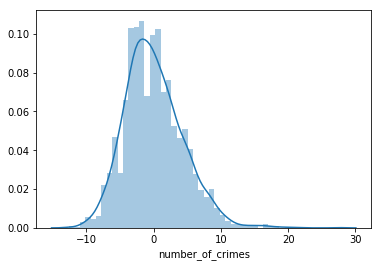

In [29]:
predictions2=regr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions2))
print('MSE:', metrics.mean_squared_error(y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))
print('R2 score: ',r2_score(y_test,predictions2))
sns.distplot(y_test-predictions2)

In [30]:
from sklearn.ensemble import AdaBoostRegressor

In [31]:
ada=AdaBoostRegressor()
ada.fit(X_train, y_train)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

MAE: 3.31239342956
MSE: 18.1788679275
RMSE: 4.2636683651
R2 score:  0.321792083214


/Users/michaeljoyce/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


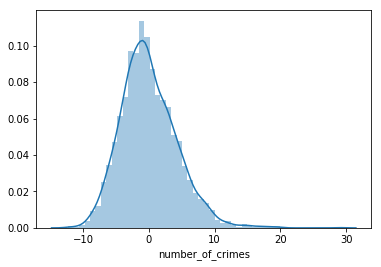

In [32]:
predictions3=clf.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions3))
print('MSE:', metrics.mean_squared_error(y_test, predictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions3)))
print('R2 score: ',r2_score(y_test,predictions3))
sns.distplot(y_test-predictions3)

MAE: 3.31239342956
MSE: 18.1788679275
RMSE: 4.2636683651
R2 score:  0.321792083214


/Users/michaeljoyce/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


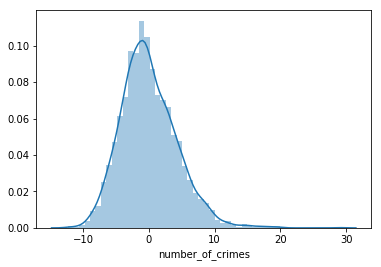

In [33]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor()
mlp.fit(X_train,y_train)
predictions4=clf.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions4))
print('MSE:', metrics.mean_squared_error(y_test, predictions4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions4)))
print('R2 score: ',r2_score(y_test,predictions4))
sns.distplot(y_test-predictions4)

In [34]:
from xgboost.sklearn import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

MAE: 3.01436022451
MSE: 15.0183220783
RMSE: 3.87534799447
R2 score:  0.439704112988


/Users/michaeljoyce/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


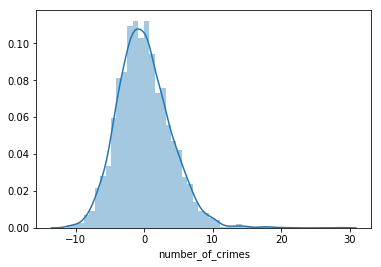

In [35]:
predictions5=xgb.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions5))
print('MSE:', metrics.mean_squared_error(y_test, predictions5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions5)))
print('R2 score: ',r2_score(y_test,predictions5))
sns.distplot(y_test-predictions5)

In [36]:
# from sklearn.grid_search import GridSearchCV

# # A parameter grid for XGBoost
# params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
# 'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}
# # Initialize XGB and GridSearch
# xgb = XGBRegressor(nthread=-1) 

# grid=GridSearchCV(xgb, params)


In [37]:
xgb2=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
xgb2.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

MAE: 3.01436022451
MSE: 15.0183220783
RMSE: 3.87534799447
R2 score:  0.439704112988


/Users/michaeljoyce/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


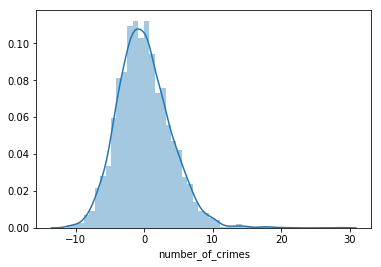

In [38]:
predictions6=xgb2.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions6))
print('MSE:', metrics.mean_squared_error(y_test, predictions6))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions6)))
print('R2 score: ',r2_score(y_test,predictions6))
sns.distplot(y_test-predictions6)

In [39]:
coeff_df2=pd.DataFrame(xgb2.feature_importances_, X_columns, columns=['Coefficient'])
coeff_df2

,Coefficient
tmax,0.092857
tmin,0.062857
day,0.180000
consumer_price_index,0.141429
gdp_millions_2007,0.110000
seasonally_adjusted_unemployment,0.070000
unadjusted_unemployment,0.031429
"Possession, cocaine",0.040000
"Heroin, possession",0.012857
Heroin Price Canada,0.034286


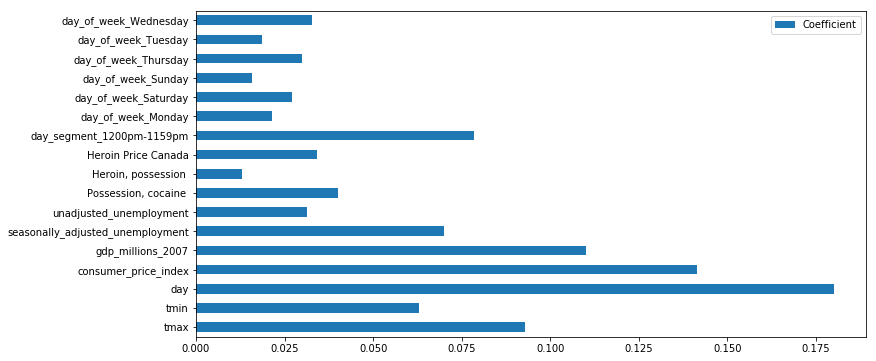

In [41]:
coeff_df2.plot(kind='barh',figsize=(12,6))
